In [1]:
# importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

**Data Preprocessing**

In [2]:
data = pd.read_csv('equipment_failure.csv')
data.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
0,100001,12/2/14,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,100001,12/3/14,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,100001,12/4/14,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,100001,12/5/14,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,100001,12/6/14,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884


In [3]:
print(f'Shape of the dataset is {data.shape}')

Shape of the dataset is (149855, 16)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149855 entries, 0 to 149854
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  149855 non-null  int64  
 1   DATE                149855 non-null  object 
 2   REGION_CLUSTER      149855 non-null  object 
 3   MAINTENANCE_VENDOR  149855 non-null  object 
 4   MANUFACTURER        149855 non-null  object 
 5   WELL_GROUP          149855 non-null  int64  
 6   S15                 149855 non-null  float64
 7   S17                 149855 non-null  float64
 8   S13                 149855 non-null  float64
 9   S5                  149855 non-null  float64
 10  S16                 149855 non-null  float64
 11  S19                 149855 non-null  float64
 12  S18                 149855 non-null  float64
 13  EQUIPMENT_FAILURE   149855 non-null  int64  
 14  S8                  149855 non-null  float64
 15  AGE_OF_EQUIPMENT    149855 non-nul

In [5]:
data.describe()

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
count,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000
mean,100320.419512,2.497561,14.185534,85.918460,35.643733,4557.518000,7.925408,8.229842,110.082879,0.001368,117.481750,2751.146341
std,178.503502,1.093775,8.665254,85.572229,14.723678,2497.993986,2.426462,13.041714,197.356230,0.036961,204.107481,3368.354905
min,100001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.490000,0.000000
25%,100164.000000,2.000000,7.548000,0.000000,28.250000,3193.000000,6.596000,0.900000,11.300000,0.000000,8.660000,755.000000
50%,100328.000000,2.000000,11.077500,95.480000,35.020000,4224.000000,8.025600,4.200000,34.000000,0.000000,44.320000,1143.000000
75%,100472.000000,3.000000,22.080000,163.660000,41.940833,5615.000000,9.480700,10.500000,118.900000,0.000000,135.080000,3224.500000
max,100612.000000,4.000000,51.225600,478.470000,570.510000,52767.000000,23.533800,291.100000,3995.900000,1.000000,1824.960000,15170.000000


In [6]:
# Step 2: Handle categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
for column in ['REGION_CLUSTER', 'MAINTENANCE_VENDOR', 'MANUFACTURER']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [7]:
# Extract features and target
X = data.drop(['EQUIPMENT_FAILURE', 'ID', 'DATE'], axis=1)
y = data['EQUIPMENT_FAILURE']

In [8]:
# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [10]:
# Compute class weights to handle imbalance
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)


In [11]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=60, class_weight={0: class_weights[0], 1: class_weights[1]}, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.5006443114458349,
                                     1: 388.5111111111111},
                       n_estimators=60, random_state=42)

In [12]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9983094957403741

In [15]:
# Evaluate the model

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[44881     6]
 [   70     0]]


In [16]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     44887
           1       0.00      0.00      0.00        70

    accuracy                           1.00     44957
   macro avg       0.50      0.50      0.50     44957
weighted avg       1.00      1.00      1.00     44957



In [17]:
feature_importances = rf_model.feature_importances_

# Step 2: Create a dataframe for the features and their importance
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Step 3: Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

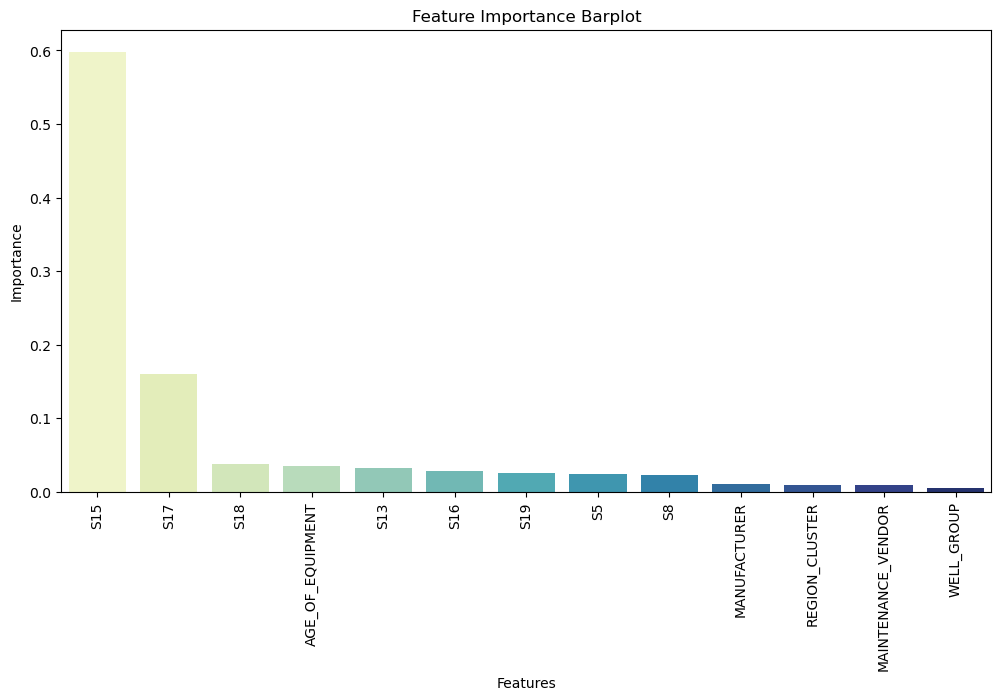

In [18]:
# Step 5: Plot a barplot for feature importance instead (to avoid formatting issues with heatmap)
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df['Feature'], y=importance_df['Importance'], palette='YlGnBu')
plt.xticks(rotation=90)
plt.title('Feature Importance Barplot')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()
